# Criando um modelo classificar e avaliação

Utilizando uma base de dados do busca de pé iremos criar um modelo para classificar e avaliar os comentários.

## Importando a base de dados

https://www.kaggle.com/code/abnerfreitas/nlp-buscape-data-ptbr-sentiment-analysis/input

In [1]:
import pandas as pd

avaliacoes = pd.read_csv('b2w.csv')

In [2]:
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0       4   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0       5   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0       1   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0       5   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN       3   

   kfold_polarity  kfold_rating  
0               1             1  
1               1             1  
2               1             1  
3               1             1  
4              -1             1

## Limpeza da base de dados

Retirando as colunas que não são necessárias.

In [3]:
avaliacoes = avaliacoes.drop(['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], axis=1)

In [4]:
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

Remevendo as colunas com valores nulos.

In [5]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [6]:
avaliacoes.isnull().all().count().sum()

2

In [7]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
2       recebi o produto antes do prazo mas veio com d...       0.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                   ...       ...
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0
132369  Eu estou muito chateado com isso gostaria que ...       0.0
132371  O produto anunciado no site dizia ser  100% al...       0.0
132372  Não recebi o produto e consta como entregue no...       0.0

[116058 rows x 2 columns]

In [8]:
# avaliacoes.polarity.value_counts()
avaliacoes['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

## Separando os dados de treino e teste

In [9]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

In [10]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

## Criando um modelo

In [76]:
# Linear Model - Logistic Regression
# from sklearn.linear_model import LogisticRegression

# regressao_ligistica = LogisticRegression()
# regressao_ligistica.fit(treino, classe_treino)
# acuracia = regressao_ligistica.score(teste, classe_teste)
# print(acuracia)

ValueError: Expected 2D array, got scalar array instead:
array=otimo pessimo nao tao e.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [13]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [15]:
matriz_esparsa

bom  este  muito  produto  ruim
0    1     1      1        1     0
1    0     1      1        1     1

Vamos aplicar o bag of words na nossa base

In [16]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


116058 -> quatidade de linhas<br/>
50508 -> quantidade de palavras únicas

In [17]:
vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [18]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8870239531276926


In [19]:
from sklearn.linear_model import LogisticRegression

def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              avaliacoes[coluna_sentimento],
                                                              stratify=avaliacoes[coluna_sentimento],
                                                              random_state=71)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


In [20]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8870239531276926


# World Cloud

Visualizando as principais reviews com uma word cloud.

https://github.com/amueller/word_cloud

In [21]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [22]:
len(todas_avaliacoes)

116058

In [23]:
len(todas_palavras)

16570763

In [24]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [25]:
nuvem_palavras

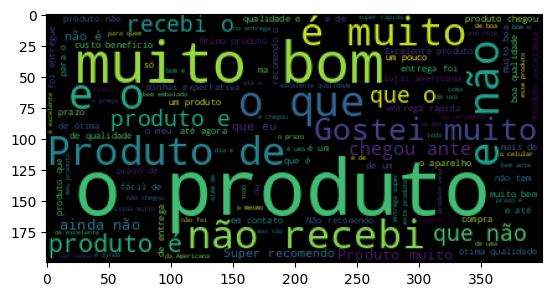

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [27]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

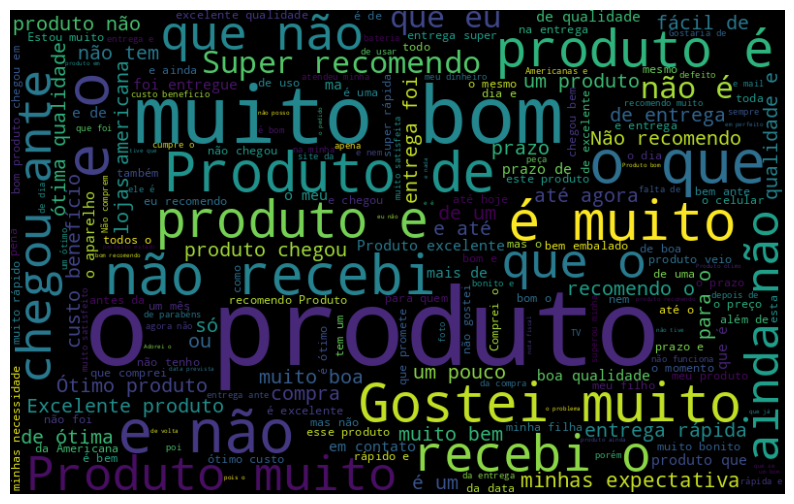

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Avaliações negativas e positivas

In [29]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query('polarity == 0')
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [30]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query('polarity == 1')
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

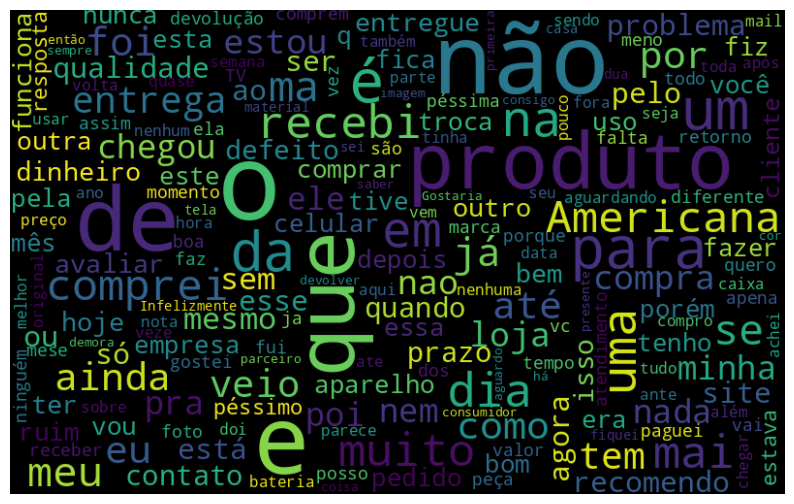

In [31]:
word_cloud_neg(avaliacoes, 'review_text')

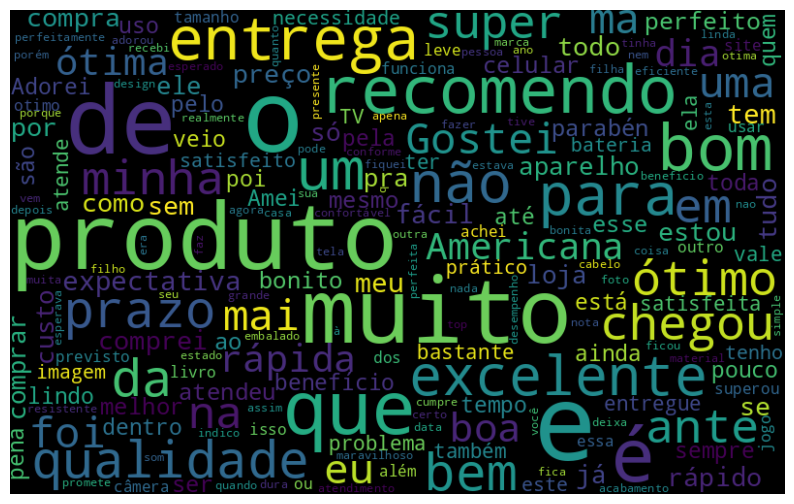

In [32]:
word_cloud_pos(avaliacoes, 'review_text')

OBS: nos gráficos existem as **stop words**, que são palavras que não fazem muito sentido na avalição do gráfico. Ex: na, dos, ao, já, ...

# NLTK

(chatgpt)<br/>
A biblioteca NLTK (Natural Language Toolkit) é uma das bibliotecas mais populares em Python para processamento de linguagem natural. Ela oferece uma variedade de ferramentas para trabalhar com textos em várias línguas, com aplicações em áreas como análise de sentimentos, extração de informações e análise semântica.

Recursos principais da NLTK:

* Tokenização: Dividir um texto em unidades linguísticas, como palavras ou sentenças.
* Stemming e lematização: Reduzir palavras à sua forma base (radical) ou forma léxica (lemma).
* Remoção de stopwords: Remover palavras comuns (como artigos e preposições) que não contribuem para o significado do texto.
* Part-of-Speech Tagging: Atribuir etiquetas gramaticais a cada palavra de um texto.
* Chunking: Identificar frases ou trechos de texto com base em suas partes do discurso.
* Classificação e análise de sentimentos: Ferramentas para classificar textos ou analisar sentimentos expressos em textos.
* Corpora e léxicos: Conjuntos de textos anotados e dicionários para ajudar nas tarefas de processamento de linguagem natural.

A NLTK é frequentemente usada em conjunto com outras bibliotecas de aprendizado de máquina para construir modelos mais complexos. É uma biblioteca de grande importância para pesquisadores e profissionais que trabalham com textos e análise de dados textuais.

In [33]:
# https://www.nltk.org/

import nltk
nltk.download("all") # baixa todos pacotes de dados do nltk

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [34]:
# Contando a frequência das frases

corpus = ["Muito este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito este produto': 1, 'Muito ruim este produto': 1})

In [35]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase) # ira gerar um array separando as strings pelo espaço
token_frase

['Muito', 'bom', 'este', 'produto']

In [36]:
token_por_espaco = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [37]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [38]:
dataframe_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()), 'frequencia': list(frequencia.values())})

In [39]:
dataframe_frequencia.head()

palavra  frequencia
0                   Bem         413
1                 macio         216
2                     e       89308
3  felpudo...recomendo.           1
4                 Preço         334

In [40]:
# listar as palavras mais frequêntes
dataframe_frequencia.nlargest(columns='frequencia', n=10)

palavra  frequencia
2         e       89308
20        o       76053
17       de       75791
39        a       66640
50      que       53574
33      não       44253
23       do       36776
43    muito       36566
60        é       36314
21  produto       34983

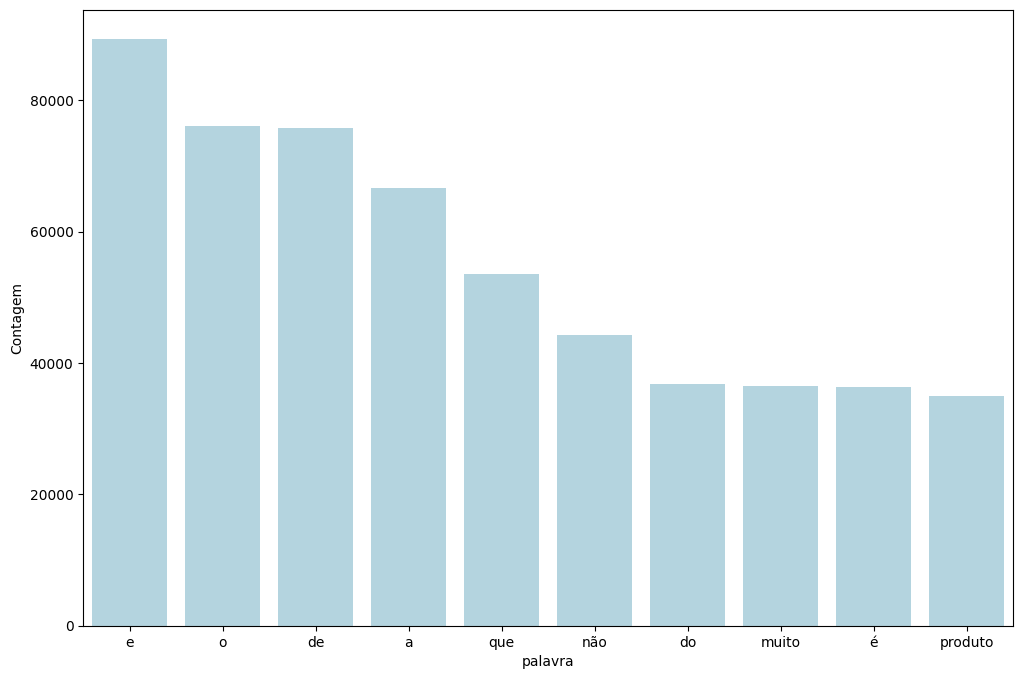

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns='frequencia', n=10), x='palavra', y='frequencia', color='lightblue')
ax.set(ylabel='Contagem')
plt.show()

In [42]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join(texto for texto in dados[coluna_texto])
  token_frase = token_por_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()), 'frequencia': list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns='frequencia', n=quantidade)

  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data = dataframe_frequencia, x='palavra', y='frequencia', color='lightblue')
  ax.set(ylabel='Contagem')
  plt.show()

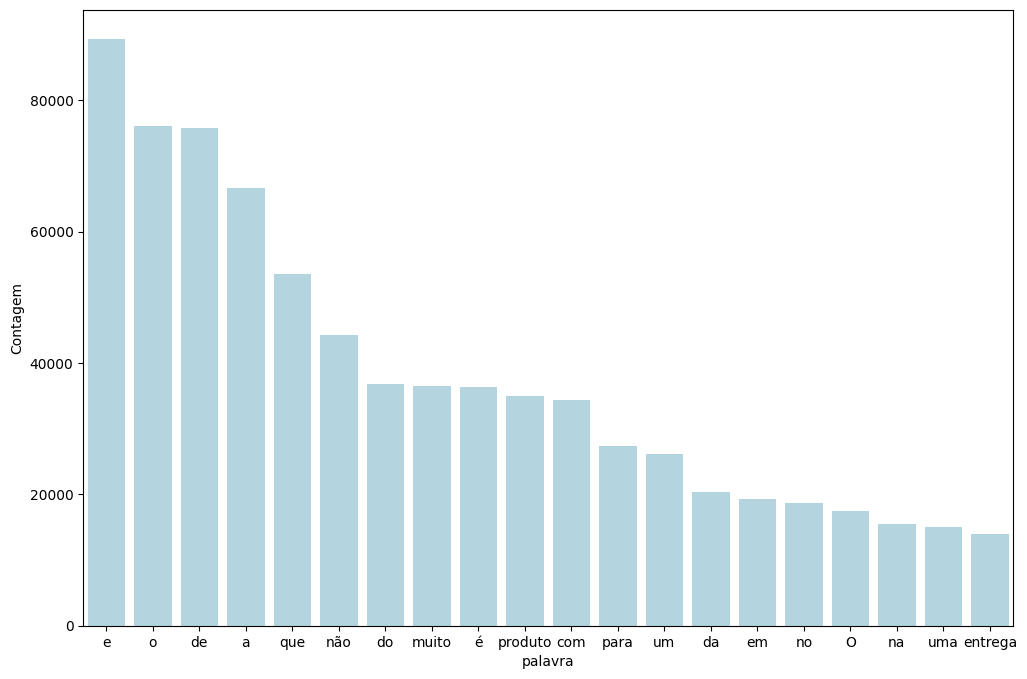

In [43]:
grafico(avaliacoes, 'review_text', 20)

# Remoção de Stop Words

In [44]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [45]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto  = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords'] = frase_processada

In [46]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo...recomendo. Preço imbatível...  
1  Produto excepcional! recomendo!!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio. Adequado pessoas fazem us...  
5  ótmo produto atendeu expectativas, entrega oco...

In [47]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords', 'polarity')

0.8790970187833879

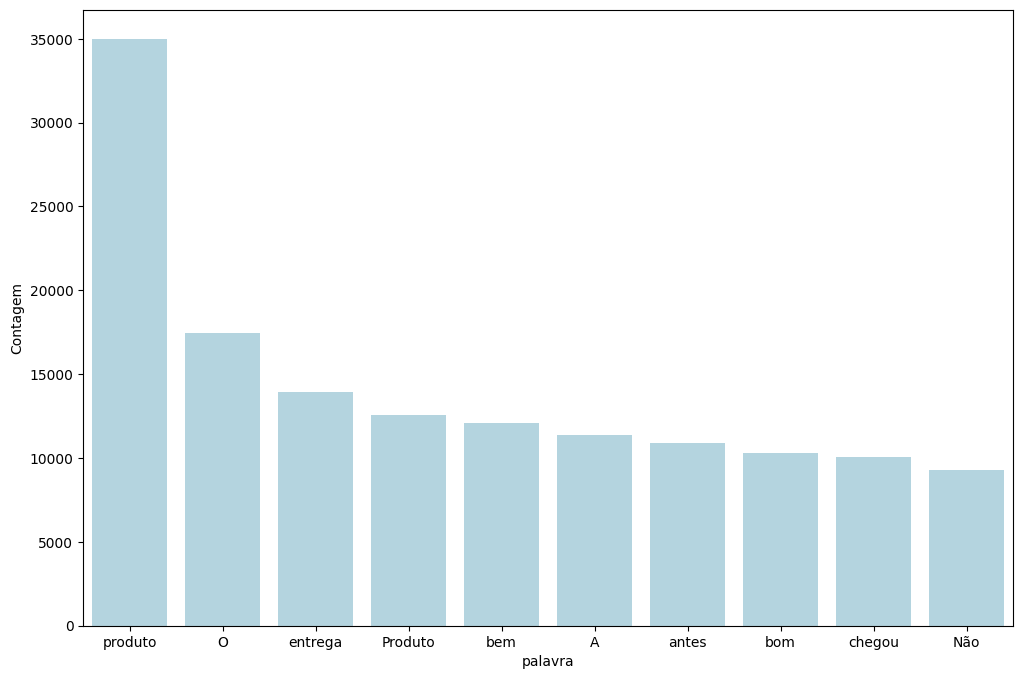

In [48]:
grafico(avaliacoes, 'texto_sem_stopwords', 10)

In [49]:
# removendo pontuacoes e acentuacao
from nltk import tokenize

frase = 'Muito bom, este produto.'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [50]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [52]:
# concatenando a lista pontuacao com palavras_irrelevantes
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao'] = frase_processada

In [53]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

In [54]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [55]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

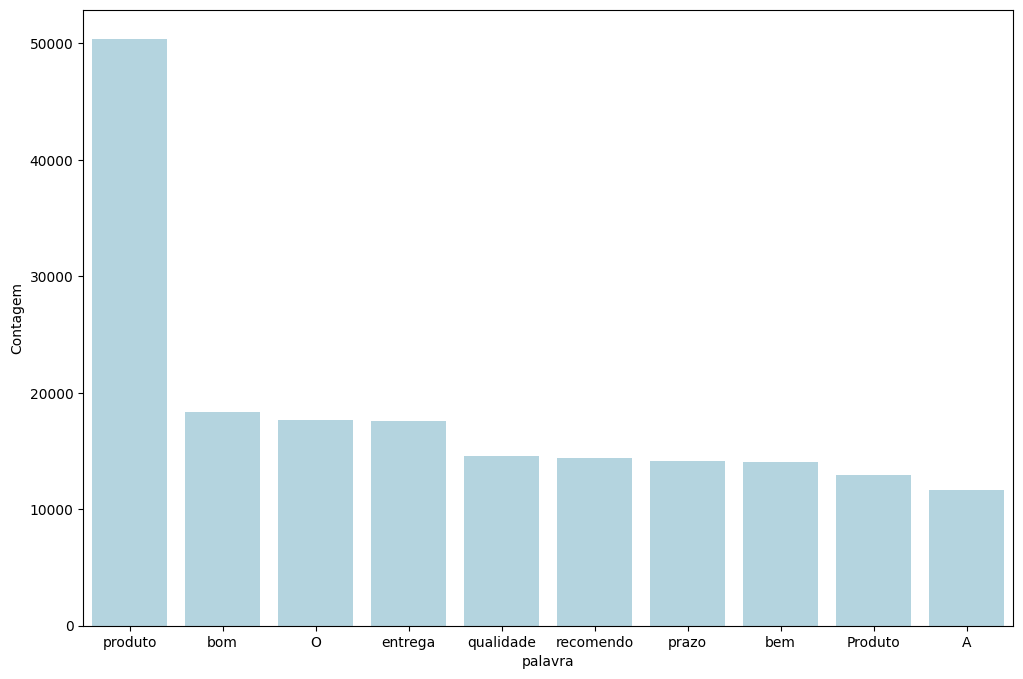

In [56]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [57]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [58]:
import unidecode

acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [59]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [60]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [61]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [62]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [63]:
avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = frase_processada

In [64]:
avaliacoes.head(10)

review_text  polarity  \
0   Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1   Produto excepcional!  recomendo!!! inovador e ...       1.0   
2   recebi o produto antes do prazo mas veio com d...       0.0   
3   Bom custo beneficio. Adequado para pessoas que...       1.0   
5   ótmo produto atendeu as expectativas, a entreg...       1.0   
6   GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...       1.0   
7   Adorei, entrega no prazo e produto conforme eu...       1.0   
8   Já é o segundo processador deste modelo que co...       1.0   
9   Nao recebi!!!  endereço para entrega : rua aug...       1.0   
10  Não compra este produto, pois o mesmo veio com...       0.0   

                                  texto_sem_stopwords  \
0   Bem macio felpudo...recomendo. Preço imbatível...   
1   Produto excepcional! recomendo!!! inovador gos...   
2   recebi produto antes prazo veio defeito trava ...   
3   Bom custo beneficio. Adequado pessoas fazem us...   
5   ótmo produto atendeu expectativas, entrega oco...   
6   GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...   
7   Adorei, entrega prazo produto conforme esperav...   
8   Já segundo processador deste modelo compro (o ...   
9   Nao recebi!!! endereço entrega : rua augusto h...   
10  Não compra produto, pois veio botões travados ...   

                      texto_sem_stopwords_e_pontuacao  \
0   Bem macio felpudo ... recomendo Preço imbatíve...   
1   Produto excepcional recomendo !!! inovador gos...   
2   recebi produto antes prazo veio defeito trava ...   
3   Bom custo beneficio Adequado pessoas fazem uso...   
5   ótmo produto atendeu expectativas entrega ocor...   
6   GOSTEI MUITO DO PRODUTO TEM ÓTIMA QUALIDADE E ...   
7   Adorei entrega prazo produto conforme esperava...   
8   Já segundo processador deste modelo compro pri...   
9   Nao recebi !!! endereço entrega rua augusto ho...   
10  Não compra produto pois veio botões travados t...   

            texto_sem_stopwords_e_pontuacao_e_acentos  
0   Bem macio felpudo ... recomendo Preco imbative...  
1   Produto excepcional recomendo !!! inovador gos...  
2   recebi produto antes prazo veio defeito trava ...  
3   Bom custo beneficio Adequado pessoas fazem uso...  
5   otmo produto atendeu expectativas entrega ocor...  
6   GOSTEI MUITO DO PRODUTO TEM OTIMA QUALIDADE E ...  
7   Adorei entrega prazo produto conforme esperava...  
8   Ja segundo processador deste modelo compro pri...  
9   Nao recebi !!! endereco entrega rua augusto ho...  
10  Nao compra produto pois veio botoes travados t...

In [65]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos', 'polarity')

0.8825090470446321

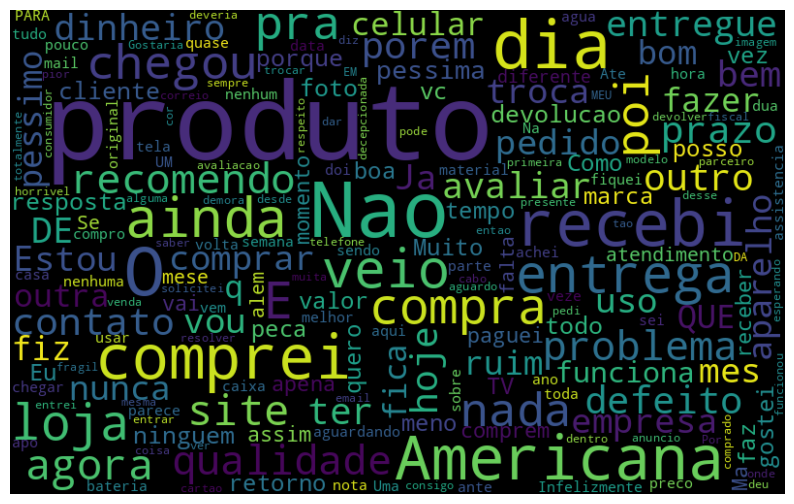

In [66]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

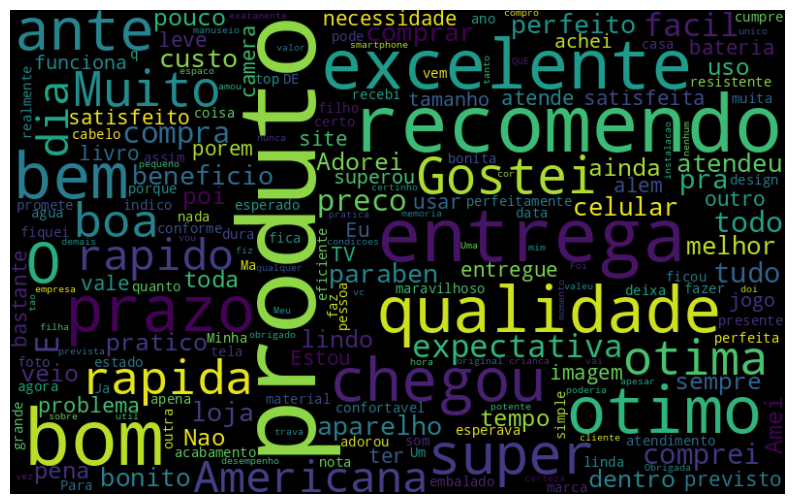

In [67]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

In [68]:
frase = 'O Rato Roeu a Roupa do Rei de Roma'
print(frase.lower())

o rato roeu a roupa do rei de roma


In [69]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos_minusculo'] = frase_processada

In [70]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

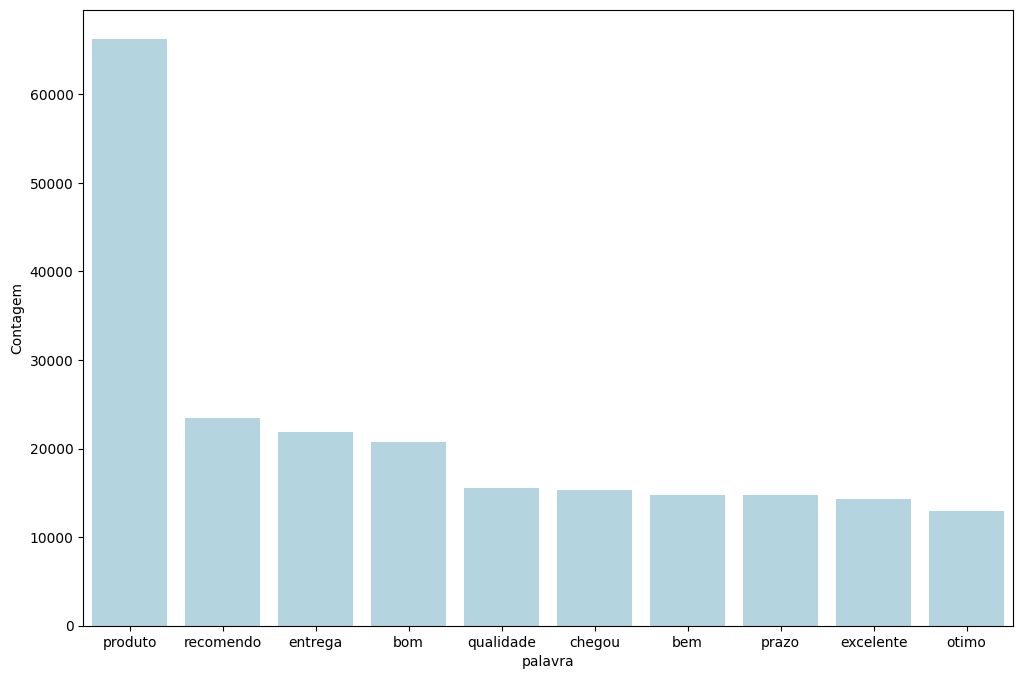

In [71]:
grafico(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo', 10)

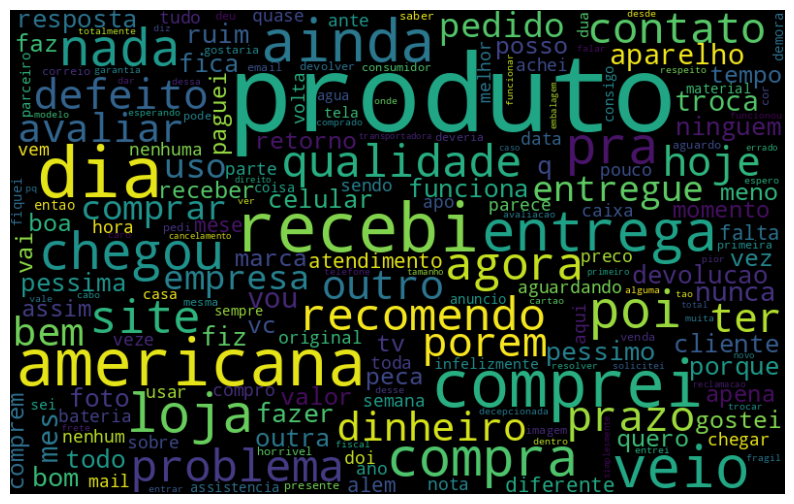

In [72]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo')

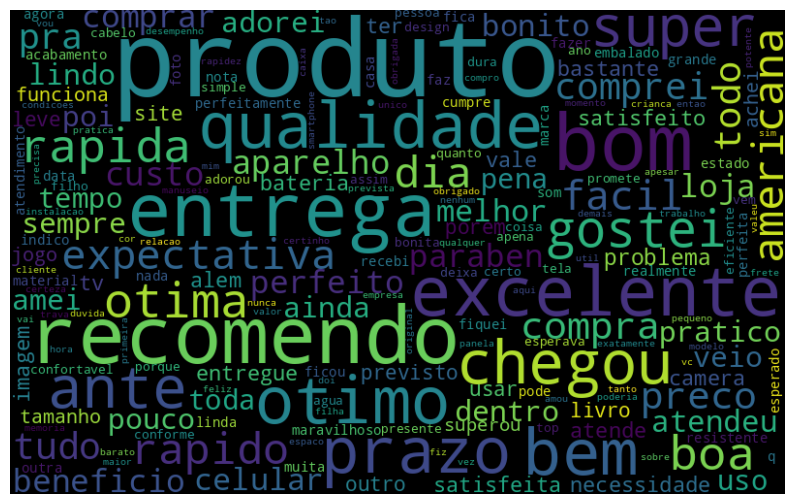

In [73]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo')

In [74]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo', 'polarity')

0.8707909701878339

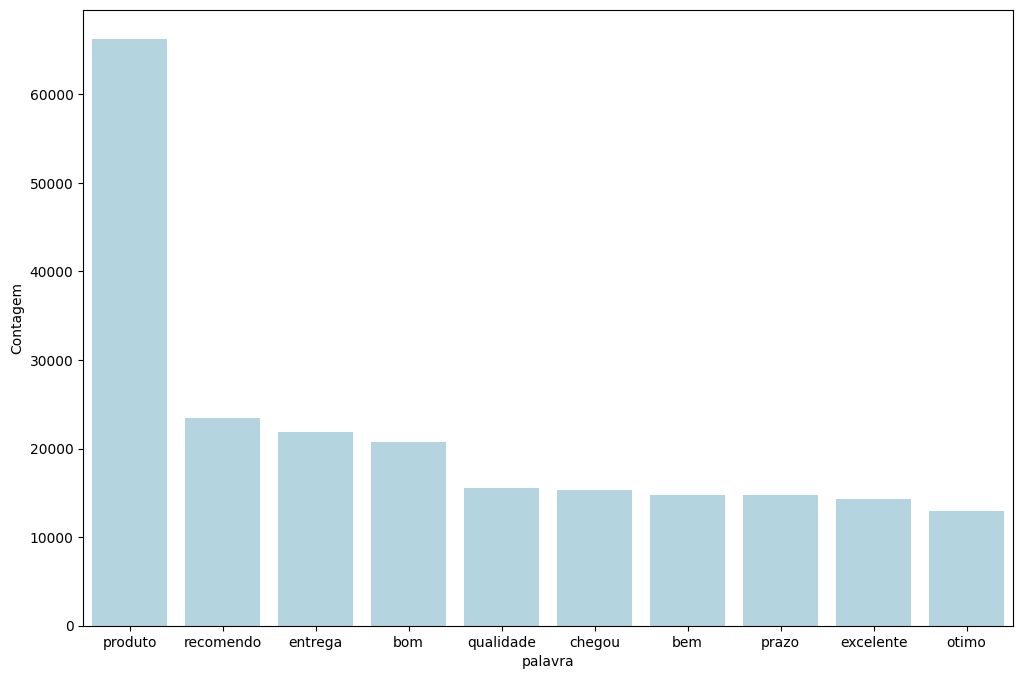

In [77]:
grafico(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo', 10)

# Stemming e RSLP

(chatgpt)<br/>
A sigla "rslp" se refere a um algoritmo de stemming (redução de palavras à sua forma raiz) específico para o português. O algoritmo "RSLP" significa "Remoção de Sufixos de Lingua Portuguesa" e é projetado para trabalhar com textos em português.

O RSLP é uma das opções de stemming disponíveis na biblioteca NLTK (Natural Language Toolkit) para o idioma português. O stemming é uma técnica de processamento de linguagem natural que reduz as palavras às suas formas básicas (ou raízes), removendo sufixos e prefixos que não são necessários para o significado central da palavra.

Por exemplo, o RSLP pode transformar palavras como "cachorros" ou "cachorrinhos" em sua forma base "cachorro". Ao fazer isso, o algoritmo pode ajudar a simplificar a análise de textos em português e facilitar tarefas como busca de informações ou classificação de textos.

In [78]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("Corredor")
stemmer.stem("Corre")
stemmer.stem("Correria")

'corr'

In [79]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

In [80]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_stemmizado'] = frase_processada

In [81]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [82]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", "polarity")

0.8707909701878339

In [83]:
treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")

0.8853007065311046

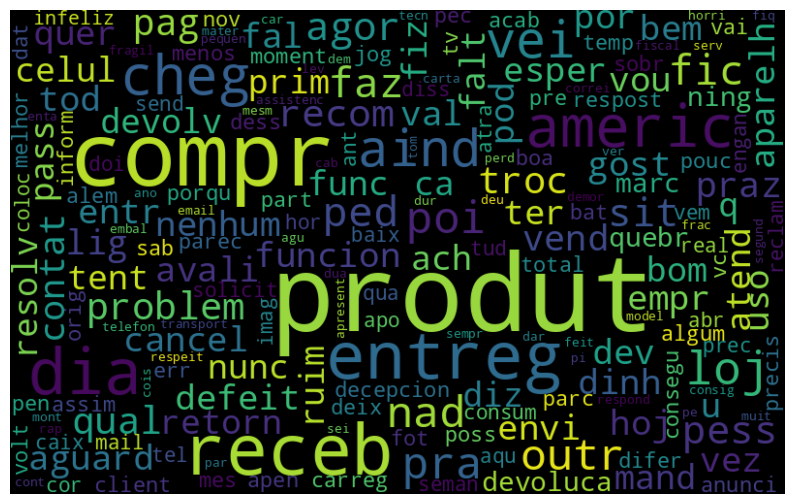

In [84]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

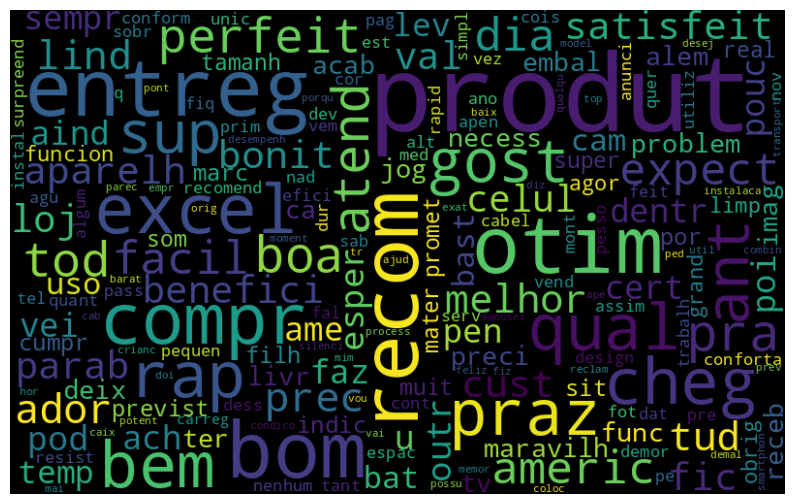

In [85]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

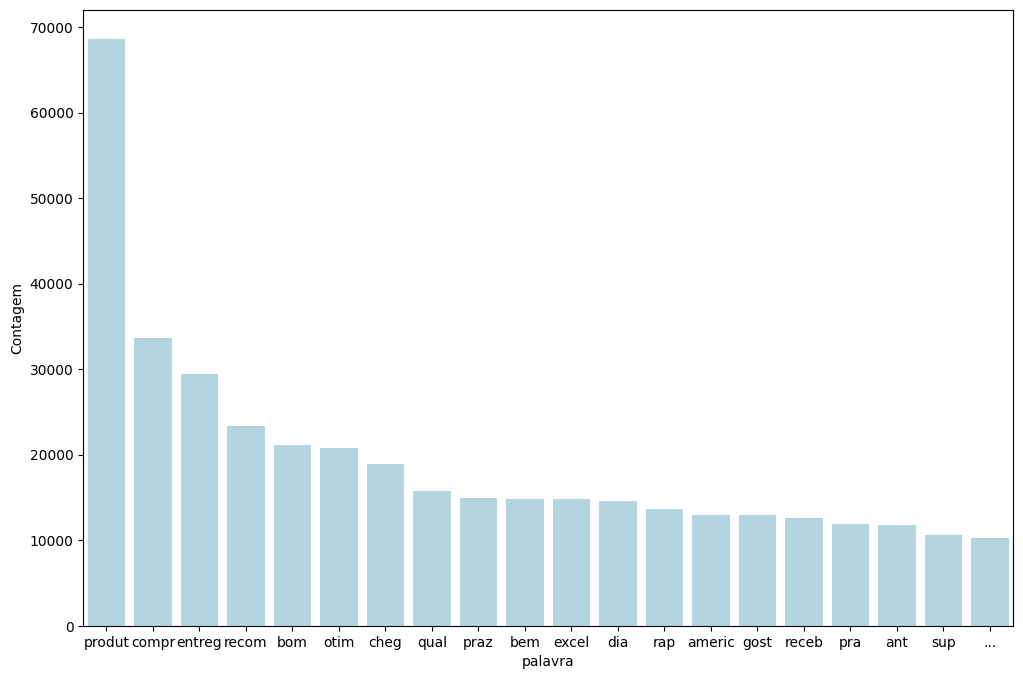

In [89]:
grafico(avaliacoes, "texto_stemmizado", 20)

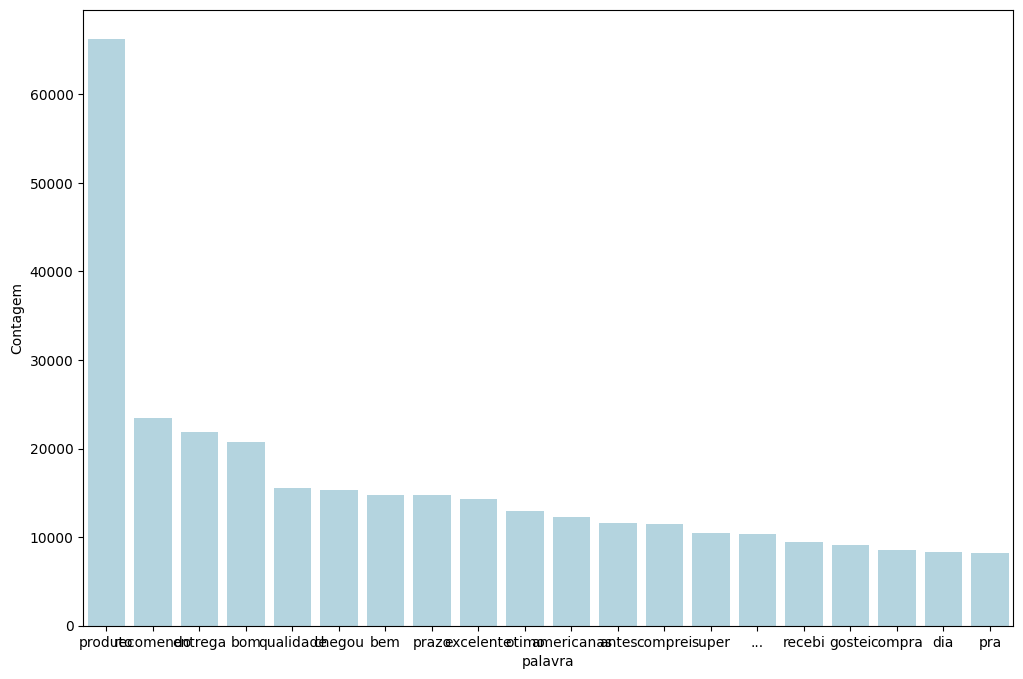

In [90]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 20)

# DF IDF

(chatgpt)<br/>
TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica amplamente utilizada em processamento de linguagem natural e recuperação de informações para avaliar a importância de uma palavra em um documento em relação a uma coleção de documentos (corpus). É uma métrica que ajuda a identificar palavras mais relevantes ou importantes para um documento específico.

A técnica TF-IDF é composta por duas partes:

1. Term Frequency (TF): A frequência do termo. É a quantidade de vezes que uma palavra específica aparece em um documento. Normalmente, é calculada dividindo o número de vezes que a palavra aparece pelo número total de palavras no documento.
2. Inverse Document Frequency (IDF): A frequência inversa do documento. É uma medida da raridade de uma palavra em um corpus de documentos. É calculada como o logaritmo do total de documentos divididos pelo número de documentos que contêm a palavra. Se uma palavra é comum em muitos documentos, seu IDF será baixo, indicando que é menos significativa para diferenciar um documento de outro.

O cálculo do TF-IDF para uma palavra em um documento é feito multiplicando o TF da palavra pelo IDF da palavra. Assim, a métrica TF-IDF dá uma maior pontuação a palavras que aparecem frequentemente em um documento, mas raramente em outros documentos, destacando-as como palavras importantes ou discriminativas para o documento.

A fórmula do TF-IDF é:

TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)

Onde:

TF(t,d) é a frequência do termo
<I>t</I> no documento <I>d</I>.

TF-IDF é comumente usado em tarefas como classificação de texto, busca de informações, análise de sentimentos e outras aplicações que envolvem trabalhar com dados textuais. Ele ajuda a identificar palavras-chave ou termos relevantes em um documento e é uma técnica eficaz para pré-processamento de dados textuais antes de alimentar modelos de aprendizado de máquina.


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Este produto é muito bom', 'Este produto é muito ruim']
tfidf = TfidfVectorizer(lowercase=False, max_features=100)
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [97]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [98]:
tfidf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, avaliacoes.polarity, stratify=avaliacoes.polarity, random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuraria_tfidf = regressao_logistica.score(teste, classe_teste)
acuraria_tfidf

0.8857142857142857

# NGrams

Os n-grams são uma técnica usada em processamento de linguagem natural para dividir um texto em sequências de palavras ou caracteres. Um n-gram é uma sequência de n elementos consecutivos, onde n pode ser qualquer número inteiro maior que zero. Os n-grams podem ser aplicados a palavras ou caracteres, dependendo da granularidade desejada.

Aqui estão os principais tipos de n-grams:

*  Unigramas (1-grams): São palavras ou caracteres isolados. Por exemplo, no texto "O rato roeu a roupa do rei", os unigrams de palavras são ["O", "rato", "roeu", "a", "roupa", "do", "rei"].
*  Bigramas (2-grams): São pares de palavras ou caracteres consecutivos. Por exemplo, no texto "O rato roeu a roupa do rei", os bigrams de palavras são [("O", "rato"), ("rato", "roeu"), ("roeu", "a"), ("a", "roupa"), ("roupa", "do"), ("do", "rei")].
*  Trigramas (3-grams): São sequências de três palavras ou caracteres consecutivos. Por exemplo, no texto "O rato roeu a roupa do rei", os trigrams de palavras são [("O", "rato", "roeu"), ("rato", "roeu", "a"), ("roeu", "a", "roupa"), ("a", "roupa", "do"), ("roupa", "do", "rei")].
*  N-grams: Em geral, n-grams podem ser de qualquer tamanho, desde unigrams até sequências mais longas, como quadgrams (4-grams), pentagrams (5-grams), etc.

Os n-grams são úteis em várias tarefas de processamento de linguagem natural, como:

* Modelagem de linguagem: Os n-grams são usados para calcular a probabilidade de sequências de palavras ou caracteres em um texto. Isso é útil em modelos de linguagem, como aqueles usados para prever palavras em uma sequência de texto.
* Classificação de texto: Os n-grams podem ser usados como recursos para classificar textos com base em padrões frequentes de palavras ou frases.
* Análise de sentimentos: Os n-grams podem ser usados para identificar padrões ou expressões específicas que indicam sentimentos ou opiniões em um texto.

Os n-grams são uma ferramenta importante em processamento de linguagem natural e podem ser usados em conjunto com outras técnicas, como TF-IDF e aprendizado de máquina, para melhorar o desempenho de várias aplicações de processamento de linguagem natural.

In [103]:
from nltk import ngrams

frase = "Comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2) # 2 -> bigram
list(pares)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [109]:
# sem o bigrams (ngrams)

tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, avaliacoes.polarity, random_state=71)
regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9321385490263657

In [110]:
# ngram_range=(1, 2) -> ira gerar quatro vetores para cada palavra (Comprei, um, ótimo, produto)
# e três vetores de pares (('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto'))
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, avaliacoes.polarity, random_state=71)
regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9360330863346545

In [111]:
# checando os pesos da palavras
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)
pesos.nlargest(10, 0)

0
otim       18.175662
excel      16.949479
bom        13.029600
perfeit    11.381989
ador       10.226311
satisfeit   8.751456
rap         8.603217
lind        8.463264
ame         7.408676
maravilh    7.300566

In [112]:
# pesos negativos
pesos.nsmallest(10, 0)

0
pess      -10.538086
ruim       -8.878829
frac       -7.530981
receb      -7.484622
decepcion  -6.958159
horri      -6.654392
fragil     -6.366852
dinh       -6.269304
vei        -6.128587
devolv     -5.993126

In [113]:
# checando os bigrams positivas
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)
pesos.nlargest(100, 0)

0
otim             18.175662
excel            16.949479
bom              13.029600
perfeit          11.381989
ador             10.226311
...                    ...
funcion perfeit   2.166529
benefici          2.139843
boa qual          2.135355
entreg rap        2.127776
filh              2.109077

[100 rows x 1 columns]

In [114]:
# checando os bigrams negativas
pesos.nsmallest(100, 0)

0
pess      -10.538086
ruim       -8.878829
frac       -7.530981
receb      -7.484622
decepcion  -6.958159
...              ...
arrepend   -2.407277
dia uso    -2.400843
lamenta    -2.391064
part       -2.380827
bom dia    -2.374309

[100 rows x 1 columns]